# Web Scraping & NLP - Central London Data Science Project Nights
Instead of relying on excel sheets and database admins to give us the data we need to do our data science, we can take the task into our own hands and collect the data ourselves just by going to webpages.

![see the data](images/neo.gif)
<p style="text-align:center">Stop seeing web pages and start seeing data.</p>

### First lets see what version of python we are on

In [4]:
import sys
if sys.version_info[0] == 3:
    print('Great! Python 3! Lets get on with scraping!')
else:
    print('Yikes! Python 2! This may not work for you! ')

Great! Python 3! Lets get on with scraping!


## Import the libraries for doing our scraping

In [5]:
# 'requests' is what we use to send web-requests (to fetch the html files from websites)
import requests

# beautiful-soup will help us in navigating through the html extract just the text we care about
from bs4 import BeautifulSoup

Now lets decide which page we want to scrap. We'll do https://techcrunch.com/ first. Open the page in your browser (by clicking on the link) to see the visual structure of the page.

In [6]:
WEB_PAGE_TO_SCRAPE_URL = "https://techcrunch.com/"

In [7]:
# send request for the web page
response = requests.get(WEB_PAGE_TO_SCRAPE_URL)

In [8]:
# lets look at some of the raw text (the html), more specificly the first 500 characters 
response.text[:500]

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" lang="en">\n<head>\n\t<title>TechCrunch - The latest technology news and information on startups</title>\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t<meta charset="UTF-8">\n\t\t<meta name="p:domain_verify" content="6189ff68ce30e30f12b40b3b40873027"/>\n\t<meta name="HandheldFriendly" content="True">\n\t<meta name="MobileOptimized" content="320'

### *Right click on the web page and click on 'view page source'*
It should look very similar to what you see above
<br/>
<br/>
<br/>
<br/>
<br/>

In [9]:
souped_page = BeautifulSoup(response.text, 'html.parser')

In [10]:
souped_page.find('title')

<title>TechCrunch - The latest technology news and information on startups</title>

In [11]:
souped_page.find('title').getText()

'TechCrunch - The latest technology news and information on startups'

## Use your browsers 'inspect' to help find the element you want to scrape

Most modern browsers allow you to find the exact code for the part of the webpage you are looking at.

In chrome: right click on the part of the page and click  ***'inspect'***



<img src="images/inspect.png" style="border: red solid 2px;" />



---



### Chrome will highlight the related part of the webpage as you move your mouse over the code

<img src="images/element_find.png" style="border: red solid 2px;" />

## BeautifulSoup query syntax

Take a look at some html that we've fetched from techcrunch.com

<img src="images/bs_syntax.png" style="width: 600px; margin-left: 0;"/>

Using beautiful-soup we could try to find this element by looking for the tag:
```python
souped_page.find('ul')
```
Look below and see what happens:

In [56]:
souped_page.find('ul')

<ul class="inline-list social-list sprite-social">
<li class="nav-followus">Follow Us</li><li class="first">
<a class="spricon nosprite icon-facebook" href="https://www.facebook.com/techcrunch" rel="external" target="_blank"><span class="is-vishidden">Facebook</span></a>
</li><li>
<a class="spricon nosprite icon-instagram" href="https://instagram.com/techcrunch" rel="external" target="_blank"><span class="is-vishidden">Instagram</span></a>
</li><li>
<a class="spricon nosprite icon-twitter" href="https://twitter.com/techcrunch" rel="external" target="_blank"><span class="is-vishidden">Twitter</span></a>
</li><li class="youtube nav-aux">
<a class="spricon nosprite icon-youtube" href="http://www.youtube.com/user/techcrunch" rel="external" target="_blank"><span class="is-vishidden">Youtube</span></a>
</li><li class="flipboard nav-aux">
<a class="spricon nosprite icon-flipboard" href="https://flipboard.com/@techcrunch" rel="external" target="_blank"><span class="is-vishidden">Flipboard</spa

## That isn't our element!?
The element we wanted looked like:
```html
<ul class="river lc-padding" id="river1">
```
Instead we got:
```html
<ul class="inline-list social-list sprite-social">
```

**The problem** is that there are loads of `ul` elements on this page (fyi `ul` means 'unordered-list').

We need to be more specific, we can search for elements based both on the tag and element attributes like so:
```python
# pass in a dictionary of the attributes you want to search for
souped_page.find('ul', {'class':'river'})
```


In [68]:
list_of_article = souped_page.find('ul', {'class':'river'})

# I won't print it all becuase it's quite long
# let's just see if all of the attributes match
list_of_aticles.attrs

{'class': ['river', 'lc-padding'], 'id': 'river1'}

In [13]:
for a in souped_page.find_all('li', {'class':['river-block ']}):
    print(a['data-sharetitle'])

Samsung’s AR Emoji taps creepy avatars and Disney characters to compete with Animoji
A ‘Black Panther’ moment
Samsung’s DeX docking station gets revamped, turning a smartphone into a trackpad
With the Galaxy S9, Samsung put the fingerprint sensor where it belongs
HMD unveils its new slate of Nokia Android smartphones starting at $85
HMD/Nokia’s smartphones join Google’s Android One program ‘leading the
Nokia 8110’s slider ‘Matrix’ feature phone returns with 4G and a €79 price
ZTE will deliver the first Android Oreo (Go Edition) handset for the U.S. market in March
ZTE brings premium features to its mid-range Blade line
Waverly Labs offers real-time translation with its Pilot earbuds
The three key CTO skills
Huawei ran out of bezel space on its new laptop, so it put a camera in its keyboard
Huawei launches its new MediaPad M5 tablets
Apple moves iCloud encryption keys for Chinese users to China


## Lets grab an article

In [14]:
ARTICLE_URL = 'https://techcrunch.com/2018/02/25/gobee-bike-throws-in-the-towel-on-france/'

In [15]:
article_response = requests.get(ARTICLE_URL)

In [16]:
article_response.text[:500]

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" lang="en">\n<head>\n\t<title>GoBee Bike throws in the towel in France  |  TechCrunch</title>\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t<meta charset="UTF-8">\n\t\t\t<script type="text/javascript">var _sf_startpt = (new Date()).getTime()</script>\n\t\t<meta name="p:domain_verify" content="6189ff68ce30e30f12b40b3b40873027"/>\n\t<meta name="Hand'

In [17]:
article_soup = BeautifulSoup(article_response.text, 'html.parser')

In [18]:
article_soup.find('title').getText()

'GoBee Bike throws in the towel in France  |  TechCrunch'

In [19]:
article_body = article_soup.find('div', {'class':['article-entry']})
article_body

<div class="article-entry text">
<!-- Begin: Wordpress Article Content -->
<img class="" src="https://tctechcrunch2011.files.wordpress.com/2017/08/gobee-2.jpg?w=738"/>
<p id="speakable-summary">Bike-sharing startup <a href="http://gobeebike.fr/en/" target="_blank">GoBee Bike</a> is giving up and <a href="http://gobeebike.fr/fr/goodbye-fr/" target="_blank">shutting down</a> in all French cities where it operates. GoBee Bike operates just like Chinese giants Ofo and Mobike. You open  the app, you find a bike on the map and you unlock it by scanning a QR code. Once you’re done, you lock it again and leave it there — there’s no dock.</p>
<p>And yet, the startup is blaming vandalism and says that the service would stop immediately. It’s worth noting that users will get a refund on their remaining balances and €15 deposit. This is a nice gesture.</p>
<p>According to the announcement, GoBee Bike managed to attract 150,000 users in Europe who used the service hundreds of thousands of times. Bu

In [20]:
article_text = article_body.getText().replace('\n', ' ')
article_text

'   Bike-sharing startup GoBee Bike is giving up and shutting down in all French cities where it operates. GoBee Bike operates just like Chinese giants Ofo and Mobike. You open  the app, you find a bike on the map and you unlock it by scanning a QR code. Once you’re done, you lock it again and leave it there — there’s no dock. And yet, the startup is blaming vandalism and says that the service would stop immediately. It’s worth noting that users will get a refund on their remaining balances and €15 deposit. This is a nice gesture. According to the announcement, GoBee Bike managed to attract 150,000 users in Europe who used the service hundreds of thousands of times. But the company’s bikes slowly became unusable. 3,200 bikes became dysfunctional, 1,000 bikes were illegally parked in someone’s home. Overall, GoBee Bike had to send someone in 6,500 cases. The startup couldn’t keep up and it became clear that the business model wasn’t scalable if you needed to fix the bikes all the time. 

<h1 style="text-align:center">Now you should see all of the internet as scrapable data </h1>
![new view](images/matrix.gif)

# Lets do some NLP now!

In [21]:
from textblob import TextBlob

In [22]:
def get_sentiment(text):
    return TextBlob(text).sentiment

In [23]:
processed_text = TextBlob(article_text)

From https://textblob.readthedocs.io/en/dev/api_reference.html#textblob.blob.TextBlob.sentiment

> TextBlob.sentiment

> Return a tuple of form (polarity, subjectivity ) where polarity is a float within the range [-1.0, 1.0] and subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [24]:
processed_text.sentiment

Sentiment(polarity=0.09011111111111111, subjectivity=0.41522222222222227)

## What are the more subjective (emotional) sentences?

In [26]:
sentences = article_text.split('.')

for sentence in sentences:
    
    sentence_sentiment = get_sentiment(sentence)
    
    if  sentence_sentiment.subjectivity > 0.5:
        print(sentence, sentence_sentiment.subjectivity)

 This is a nice gesture 1.0
 Mobike has been around for a month and rides are free as well 0.8
 Even Obike gave you 50 free rides when you signed up 0.8
 It’s hard to compete with free 0.6708333333333334


## Can we plot the words by their sentiment? 

In [32]:
# import ploting library 
import matplotlib.pyplot as plt

# draw plot in notebook
%matplotlib inline

In [33]:
# get all word indevidually by splitting on every space
words = article_text.split(' ')

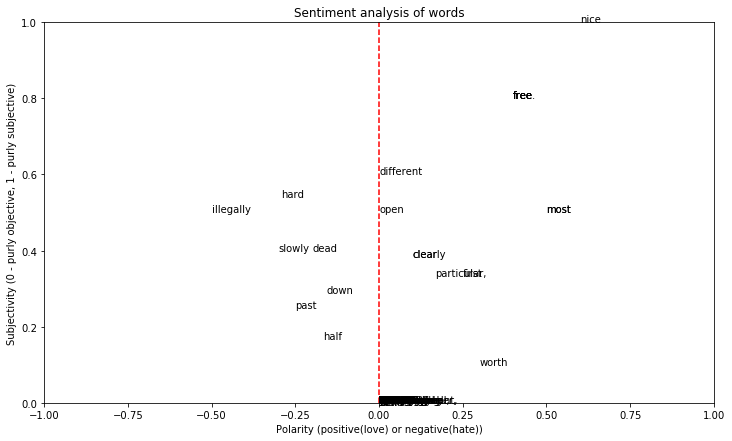

In [55]:
plt.figure(figsize=(12,7))

for word in words:
    word_sentiment = get_sentiment(word)
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words')
plt.xlabel('Polarity (positive(love) or negative(hate))')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

plt.show()